# To use this code you will need to have a text file of the kepler data that has already been parsivaled

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths

In [2]:
def bin_it(yvalues,binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    return np.array(newy)

In [18]:
def find_nearest(array, value):
    '''finds value closest to a given value in an array'''
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

In [57]:
def fitgaus(x,y,Minsep,guess_vals,factor):
    '''fits a gaussian to'''
    peaks,_ = find_peaks(y, distance = Minsep)
    proms = peak_prominences(y, peaks)[0]
    averageprom=np.mean(proms)
    C=0
    selectedpeaks=[]
    for n in proms:
        if n>averageprom*factor:
            selectedpeaks.append(peaks[C])
        C+=1
    x2=[]
    y2=[]
    for n in selectedpeaks:
        x2.append(x[n])
        y2.append(y[n])
    for n in selectedpeaks:
        plt.scatter(x[n],y[n],color='red')
    plt.plot(x,y)
    best_vals, covar = curve_fit(gaus, x2, y2,p0=guess_vals,bounds=([0, 0, 0], [3, 4000, np.inf]))
    plt.plot(x,peak(x,best_vals[0],best_vals[1],best_vals[2],averagey),color='purple')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title(f'Minsep: {Minsep}  Factor: {factor}')
    plt.show()
    return best_vals

In [30]:
def peak(x,height,centre,width,averagey):
    '''plots a gaussian'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))+averagey

In [31]:
def gaus(x,height,centre,width):
    '''plots a gaussian'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))

In [66]:
data = np.genfromtxt('Star data KIC5184732.txt',unpack=True) #loads in data 

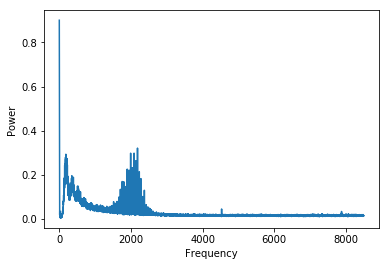

Estimate the lower end of p nodes: 1250
Estimate the upper end of p nodes: 3000


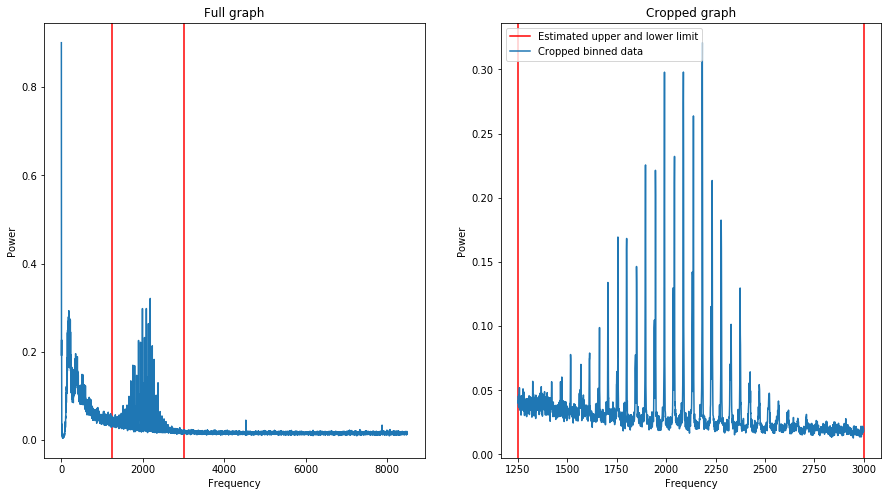

In [68]:
binsize = 100
x=data[0][0::binsize] #removes all but every 100th x value to match binned y value
y=bin_it(data[1],binsize) #bins y data in a given bin size
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()
lowerlim = input('Estimate the lower end of p nodes: ')
upperlim = input('Estimate the upper end of p nodes: ') #user estimates the sides of the p nodes
lowerxindex=find_nearest(x,int(lowerlim))
upperxindex=find_nearest(x,int(upperlim))
fig, (ax1,ax2) = plt.subplots(1, 2 ,figsize=(15,8)) #genrates needed subplots
ax1.axvline(int(x[lowerxindex]),color='red')
ax1.axvline(int(x[upperxindex]),color='red',label='Estimated upper and lower limit')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Power')
ax1.set_title('Full graph')
ax1.plot(x,y,label='Binned data')
ax2.axvline(int(x[lowerxindex]),color='red')
ax2.axvline(int(x[upperxindex]),color='red',label='Estimated upper and lower limit')
ax2.plot(x[lowerxindex:upperxindex],y[lowerxindex:upperxindex],label='Cropped binned data')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')
ax2.set_title('Cropped graph')
ax2.legend()

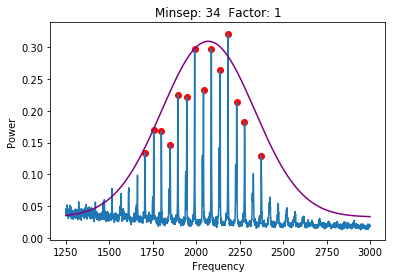

vmax: 2069.8293924724553


In [74]:
x2=x[lowerxindex:upperxindex]
y2=y[lowerxindex:upperxindex] #reduces x and y to the estimated limits
averagey=np.mean(y2) #average baseline of noise to adjust the gaussian plot by
guess_vals=[np.max(y2),x2[0]+(x2[-1]-x2[0])/2,(x2[-1]-x2[0])/4] #[amp, cen, wid] intial values for curve fitting program
best_vals=fitgaus(x2,y2,34,guess_vals,1) 
print(f'vmax: {best_vals[1]}')

Star: KIC3427720  vmax:2671.5044256422066
Star: KIC3656476  vmax:1904.231768554498
Star: KIC5184732  vmax:2069.8293924724553